 # Задание 1

Найдите наилучшее приближение $A_1$ ранга 2 для матрицы $A$ в норме
$|| · ||_2$ и найдите $||A - A_1||_2$, где

$A = \begin{pmatrix}
92 & -57 & 46 & 36 \\
50 & 78 & -68 & -72 \\
-41 & -96 & 44 & -90
\end{pmatrix}$

Возьмем матрицу размера $A$ с первыми $r$ сингулярными числами на главной диагонали (где $r = rank(A)$). Это матрица имеет вид:

$diag = \begin{pmatrix}
\sigma_1 & 0 & 0 & 0 \\
0 & \sigma_2 & 0 & 0 \\
0 & 0 & \sigma_3 & 0 \\
\end{pmatrix}$

Эта матрица будует наилучшим приближением по евклидовой норме.
Тогда $A_1 = diag - A$

In [ ]:
import sympy as sp
import numpy as np

A = np.matrix(
    [[92, -57, 46, 36],
    [50, 78, -68, -72],
    [-41, -96, 44, -90]]
)

print("Ранг A = ", np.linalg.matrix_rank(A))

U, Σ, Vt = np.linalg.svd(A)
Σ = Σ.astype(int)
Σ = sorted(Σ)
print("Сингулярные числа: ", Σ)

diagonal_matrix = np.diag(Σ)

print("Матрица с сингулярными числами: \n", diagonal_matrix)

A1 = (np.column_stack((diagonal_matrix, np.zeros(3))) - A).astype(int)

print("Наилучшее приближение A1\n", A1)
print("\n")

Ранг A =  3
Сингулярные числа:  [99, 132, 165]
Матрица с сингулярными числами: 
 [[ 99   0   0]
 [  0 132   0]
 [  0   0 165]]
Наилучшее приближение A1
 [[  7  57 -46 -36]
 [-50  54  68  72]
 [ 41  96 121  90]]




Ответ:

$A_1 = \begin{pmatrix}
7 & 57 & -46 & -36 \\
-50 & 54 & 68 & 72 \\
41 & 96 & 121 & 90
\end{pmatrix}$

# Задание 2

Найдите приближенное решение системы $AX=b$, округлив значения до ближайших целых, и оцените его относительную погрешность по нормам $|·|_1$ и $|·|_2$, используя число обусловленности матрицы $A$, где
$$
A =
\begin{pmatrix}
-5.1 & 0.04 \\
-4.86 & -8.08
\end{pmatrix},
\ b =
\begin{pmatrix}
-4.82 \\
-13.06
\end{pmatrix}
$$

Округлим матрицы:
$$
A' =
\begin{pmatrix}
-5 & 0 \\
-5 & -8
\end{pmatrix},
\ b' =
\begin{pmatrix}
-5 \\
-13
\end{pmatrix}
$$

Найдем решение $A'x = b'$

$$
\begin{pmatrix}
-5 & 0 \\
-5 & -8
\end{pmatrix}
\cdot
X
=
\begin{pmatrix}
-5 \\
-13
\end{pmatrix}
$$

$$
X
=
\begin{pmatrix}
1 \\
1
\end{pmatrix}
$$

Причем

$\tilde{A} = A + \Delta A;\  \delta A = \frac{||\Delta A||}{||A||}$

$\tilde{b} = b + \Delta A;\  \delta b = \frac{|\Delta b|}{|b|}$

$\tilde{x} = x + \Delta x;\ \delta x = \frac{|\Delta x|}{|x|}$

Тогда верхняя оценка относительной погрешности приближённого решения имеет вид:
$
\delta X \le K(A) (\delta A + \delta b)
$, где $K_*(A) = ||A^{-1}||_* \cdot ||A||_*$


In [ ]:
A_app = sp.Matrix([[-5, 0], [-5, -8]])
A = sp.Matrix([[-5.1, 0.04], [-4.86, -8.08]])
b_app = sp.Matrix([[-5], [-13]])
b = sp.Matrix([[-4.82], [-13.06]])

In [ ]:
A_app_norm1 = A_app.norm(1)
b_app_norm1 = b_app.norm(1)

dA = A_app - A
db = b_app - b

dA_norm1 = (dA).norm(1)
db_norm1 = (db).norm(1)

A_inv_1 = (A_app ** (-1)).norm(1)

K_norm1 = A_app_norm1 * A_inv_1

deltaA_norm1 = dA_norm1 / A_app_norm1
deltab_norm1 = db_norm1 / b_app_norm1

deltax_norm = K_norm1 * (deltaA_norm1 + deltab_norm1)

display(sp.simplify(deltax_norm).evalf(5))
print("\n")

0.12133

In [ ]:
A_app_norm2 = A_app.norm(2)
b_app_norm2 = b_app.norm(2)

dA = A_app - A
db = b_app - b

dA_norm2 = (dA).norm(2)
db_norm2 = (db).norm(2)

A_inv_2 = (A_app ** (-1)).norm(2)

K_norm2 = A_app_norm2 * A_inv_2

deltaA_norm2 = dA_norm2 / A_app_norm2
deltab_norm2 = db_norm2 / b_app_norm2

deltax_norm = K_norm2 * (deltaA_norm2 + deltab_norm2)

display(sp.simplify(deltax_norm).evalf(4))
print("\n")

0.08104

Погрешность по $|·|_1$ составляет $12.1\%$, по $|·|_2$ - $8.1\%$

Проверим решение

In [ ]:
res = sp.Matrix([[1], [1]])
X = A.solve(b)
display(X - res)
print("\n")

Matrix([
[-0.0467219291635267],
[  0.042954031650339]])

# Задание 3

Найдите приближенное решение системы и оцените его относительную погрешность по нормам $|·|_2$ и $|·|_{\infty}$:
$$
\begin{cases}
-3(8 + \varepsilon_1)x + 2(-3 + \varepsilon_2) y = 3 + \varepsilon_3 \\
-2x + (-4 + \varepsilon_1) y = -3 + \varepsilon_4
\end{cases}
$$
где неизвестные $\varepsilon_j$ удовлетворяют условию $|\varepsilon_j| < 0.05$ для всех $j = 1, ..., 4$

Перейдем к матрицам:

$$
 A = \begin{pmatrix}
 -24 & -6 \\
 -2 & -4
 \end{pmatrix}; \
 b = \begin{pmatrix}
 3 \\
 -3
 \end{pmatrix}
$$

Найдем решение $Ax = b$

$$
\begin{pmatrix}
-24 & -6 \\
-2 & -4
\end{pmatrix}
\cdot
X
=
\begin{pmatrix}
3 \\
-3
\end{pmatrix}
$$

$$
X
=
\frac{1}{84}
\cdot
\begin{pmatrix}
-4 & 6 \\
2 & -24
\end{pmatrix}
\cdot
\begin{pmatrix}
3 \\
-3
\end{pmatrix}
$$

$$
X
=
\begin{pmatrix}
\frac{-5}{14} \\
\frac{13}{14}
\end{pmatrix}
$$

Введем:

$$
 \Delta A = \begin{pmatrix}
 -3\varepsilon_1  & 2\varepsilon_2 \\
 0 & \varepsilon_1
 \end{pmatrix}; \
 \Delta b = \begin{pmatrix}
 \varepsilon_3 \\
 \varepsilon_4
 \end{pmatrix}
$$

Аналогично предыдущему заданию посчитаем $
\delta X \le K(A) (\delta A + \delta b)
$, где $K_*(A) = ||A^{-1}||_* \cdot ||A||_*$

In [ ]:
e1, e2, e3, e4 = sp.symbols('epsilon_1 epsilon_2 epsilon_3 epsilon_4')

A = sp.Matrix([[-24, -6], [-2, -4]])
b = sp.Matrix([[3], [-3]])

In [ ]:
def count_norm(eps1, eps2, eps3, eps4, norm_id):
  dA = sp.Matrix([[-3 * eps1, 2 * eps2], [0, eps1]])
  db = sp.Matrix([[eps3], [eps4]])

  A_norm = A.norm(norm_id)
  b_norm = b.norm(norm_id)

  A_inv_norm = (A ** (-1)).norm(norm_id)

  dA_norm = dA.norm(norm_id)
  db_norm = db.norm(norm_id)

  K_norm = A_norm * A_inv_norm

  deltaA_norm = dA_norm / A_norm
  deltab_norm = db_norm / b_norm
  deltaX_norm = K_norm * (deltaA_norm + deltab_norm)

  print(f'Относительная погрешность решения по |·|_{norm_id}')
  display(sp.simplify(deltaX_norm).evalf(5))

Наибольшее значение по нормам $|·|_2$ и $|·|_{\infty}$ достигается при максимальных значениях $\varepsilon_1$ и $\varepsilon_2$, которые равны 0.05

In [ ]:
e1 = 0.05
e2 = 0.05
e3 = 0.05
e4 = 0.05

count_norm(e1, e2, e3, e4, 2)
count_norm(e1, e2, e3, e4, +sp.oo)
print("\n")

Относительная погрешность решения по |·|_2


0.17727

Относительная погрешность решения по |·|_oo


0.23214

In [ ]:
display(A.solve(b))
print('\n')

Matrix([
[-5/14],
[13/14]])

$
X
=
\begin{pmatrix}
\frac{-5}{14} \\
\frac{13}{14}
\end{pmatrix}
$

Погрешности по нормам равны $17.7\%$ и $23.2\%$ соответственно.

# Задание 4

Найдите приближённо обратную матрицу к матрице A и оцените погрешность приближения относительно равномерной нормы $||⋅||_1$, если элементы матрицы A известны с абсолютной погрешностью $\varepsilon = 0.01$:
$$
A = \begin{pmatrix} -1 & 5 \\ -2 & -6 \end{pmatrix}
$$

Найдем обратную матрицу:

$$
A^{-1} = \frac{1}{(-1) \cdot (-6) - (-2) \cdot 5} \cdot \begin{pmatrix} -6 & -5 \\ 2 & -1 \end{pmatrix} = \frac{1}{16} \cdot \begin{pmatrix} -6 & -5 \\ 2 & -1 \end{pmatrix}
$$

$$
A^{-1} =
\begin{pmatrix}
\frac{-3}{8} & \frac{-5}{16} \\
\frac{1}{8} & \frac{-1}{16}
\end{pmatrix}
$$

$
\delta A^{-1} = \frac{||(A + \mathcal{E})^{-1} - A^{-1}||}{||A^{-1}||_1} =
\frac{||- A^{-1}(E - A(A + \mathcal{E})^{-1})||}{||A^{-1}||_1} =
\frac{||- A^{-1}(E - (E + \mathcal{E}A^{-1})^{-1})||}{||A^{-1}||_1} \le
{||E - (E + \mathcal{E}A^{-1})^{-1}||} \le
\frac{K(A) \delta(A)}{1 - K(A) \delta(A)} ≈
{K(A) \delta(A)}
$

In [ ]:
A = sp.Matrix([[-1, 5], [-2, -6]])
dA = sp.Matrix([[0.01, 0.01], [0.01, 0.01]])

A_norm = A.norm(1)
A_inv_norm = (A ** (-1)).norm(1)
dA_norm = dA.norm(1)
deltaA = dA_norm / A_norm
K_norm = A_norm * A_inv_norm

deltaA_inv = K_norm * deltaA / (1 - K_norm * deltaA)
print("Погрешность:")
display(deltaA_inv)
print("Погрешность с округленнием:")
display(K_norm * deltaA)
print("\n")

Погрешность:


0.0101010101010101

Погрешность с округленнием:


0.0100000000000000

Погрешность примерно равна 1.01%

$$
A^{-1} =
\begin{pmatrix}
\frac{-3}{8} & \frac{-5}{16} \\
\frac{1}{8} & \frac{-1}{16}
\end{pmatrix}
$$

# Задание 5


Решите систему линейных уравнений методом простых итераций:
$$
\begin{cases}
20x + 3y + 3z = 3 \\
6x + 22y + 5z = 6 \\
4x + 2y + 24z = 4
\end{cases}
$$
Определите номер итерации, после которой погрешность приближения по каждой координате не превосходит $0.01$ и найдите соответствующее приближенное решение. Начните с $x_0 = [0, 0, 0]^T$.

Рассмотрим последовательность $x_0$, $G(x_0)$, $G(G(x_0))$ и т. д.

Если существует $\lim_{n\rightarrow \infty} x_n = \hat{x}$, то $\hat{x} = G(\hat{x})$ - решение системы

Пусть $A = M - N$, где M - обратимая, тогда:

$(M - N)x = b$

$x = M^{-1}Nx + M^{-1}b$

$P = M^{-1}N, b_{new} = M^{-1}b$

$x = Px + b_{new}$

Возьмем $M = D (диагональ A)$ по методу Якоби

$ M =
\begin{pmatrix}
20 & 0 & 0 \\
0 & 22 & 0 \\
0 & 0 & 24
\end{pmatrix}
$

$A = M - N$ $⇒$ $N = M - A$


In [ ]:
A = sp.Matrix([[20, 3, 3], [6, 22, 5], [4, 2, 24]])
b = sp.Matrix([[3], [6], [4]])
M = sp.Matrix([[20, 0, 0], [0, 22, 0], [0, 0, 24]])
x = sp.Matrix([[0], [0], [0]])
N = M - A

P = M ** (-1) @ N
b_new = M ** (-1) @ b

cnt = 1
x_new = P @ x + b_new

while (x_new - x).norm(+sp.oo) / (1 - P.norm(+sp.oo)) > 0.01:
  cnt += 1
  x, x_new = x_new, P @ x_new + b_new

print("Количесво итераций: ", cnt)
display(x.evalf(5))
print("\n")

Количесво итераций:  5


Matrix([
[0.096112],
[  0.2136],
[ 0.13093]])

Проверка

In [ ]:
res = A.solve(b)
res = res.evalf(5)
display(res - x.evalf(5))
print("\n")

Matrix([
[0.0016336],
[0.0023863],
[ 0.001452]])

Потребовалось 5 итераций, чтобы нати решение
$X = \begin{pmatrix}
0.09611 \\
0.2136 \\
0.13093 \\
\end{pmatrix}$

  


# Задание 6

Найдите наиболее влиятельную вершину графа, используя алгоритм
PageRank с коэффициентом затухания равным $\alpha = 1 - \beta = 0.85$, где
матрица смежности графа:
$$ A =
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 \\
1 & 0 & 1 & 1 & 0 \\
1 & 1 & 0 & 0 & 1 \\
1 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

Шаги алгоритма:

1. Сначала нормализуем матрицу смежности
2. Затем создадим вектор PageRank, изначально с равными значениями для всех узлов: $pr_{i} = 1 / n$, где n - количесво вершин в графе
3. Теперь будем итеративно применять формулу PageRank: $pr_{new} = (1-α) / n + α \cdot M \cdot pr$ Мы будем повторять этот шаг, пока разница между новым и старым вектором PR не станет меньше некоторого малого числа (например, 1e-8)
4. После сходимости, узел с наибольшим значением PR будет наиболее влиятельным.

In [ ]:
import numpy as np

A = np.array([
    [0, 0, 0, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 0, 1],
    [1, 0, 0, 1, 1],
    [1, 0, 0, 0, 0]
])

alpha = 0.85
n = A.shape[0]

M = A / A.sum(axis=0)

pr = np.ones(n) / n

while True:
    pr_new = (1-alpha) / n + alpha * M @ pr
    if np.sum(np.abs(pr_new - pr)) < 1e-8:
        break
    pr = pr_new

print("PageRank значения:")
for i, value in enumerate(pr):
    print(f"Вершина {i+1}: {value:.4f}")

print(f"\nСамая влиятельная вершина: {np.argmax(pr)+1}")
print("\n")

PageRank значения:
Вершина 1: 0.0410
Вершина 2: 0.4239
Вершина 3: 0.4100
Вершина 4: 0.0864
Вершина 5: 0.0387

Самая влиятельная вершина: 2




Самая влиятельная вершина: 2

#Задание 7

Найти значение $f(A)$ для функции $f(l) = ln(l + 5)$, где
$ A =
\begin{pmatrix}
0 & 0 & -1 \\
1 & -1 & 3 \\
1 & -4 & 6
\end{pmatrix}
$


In [ ]:
A = sp.Matrix([
    [0, 0, -1],
    [1, -1, 3],
    [1, -4, 6]
])

eigen_info = A.eigenvects()
eigenvalues = [item[0] for item in eigen_info for _ in range(item[1])]
eigenvectors = [list(item[2][0]) for item in eigen_info for _ in range(item[1])]

display(eigenvalues)
display(eigenvectors)
print("\n")

[1, 1, 3]

[[-1, 1, 1], [-1, 1, 1], [-1/3, 2/3, 1]]

$|\lambda E - A| = (\lambda - 1)^{2} \cdot (\lambda - 3)$

Характеристический многочлен имеет кратные корни, поэтому воспользуемся многочленом Лагранжа-Сильвестра. Тогда:

$$
r(\lambda) = \sum_{k=1}^s f(\lambda_k) \varphi_{k1}(\lambda) + f'(\lambda_k) \varphi_{k2}(\lambda) + ... + f^{(m_k - 1)} (\lambda_k) \varphi_{km_k} (\lambda)
$$

$$
f(A) = \sum_{k=1}^s f(\lambda_k) Z_{k1} + f'(\lambda_k) Z_{k2} + ... + f^{(m_k - 1)} (\lambda_k) Z_{km_k}
$$

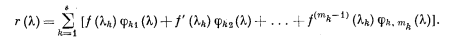


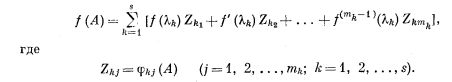

In [ ]:
A = sp.Matrix([
    [0, 0, -1],
    [1, -1, 3],
    [1, -4, 6]
])

E = sp.diag([1],[1],[1])

display(A - E)
display((A - E) ** 2)
print("\n")

Matrix([
[-1,  0, -1],
[ 1, -2,  3],
[ 1, -4,  5]])

Matrix([
[0,   4, -4],
[0,  -8,  8],
[0, -12, 12]])

$f(A) = f(1) Z_{11} + f'(1) Z_{12} + f(3) Z_{21}$

Тогда:

$ln(A + 5) = ln(6) Z_{11} + \frac{1}{6} Z_{12} + ln(8) Z_{21}$

Подставим в $f(\lambda)$ последовательно $1, \lambda - 1 \ и  \ (\lambda - 1)^2$

$
f_1(A) = E =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}=  z_{11} + z_{21} \\
$

$
f_2(A) = A - E =
\begin{pmatrix}
-1 & 0 & -1 \\
1 & -2 & 3 \\
1 & -4 & 5
\end{pmatrix} = z_{12} + 2z_{21}\\
$

$
f_3(A) = (A - E)^2 =
\begin{pmatrix}
0 & 4 & -4 \\
0 & -8 & 8 \\
0 & -12 & 12
\end{pmatrix} = 4z_{21}\\
$


$
Z_{11} =
\begin{pmatrix}
1 & -1 & 1 \\
0 & 3 & -2 \\
0 & 3 & -2
\end{pmatrix}
$

$
Z_{12} =
\begin{pmatrix}
-1 & -2 & 1 \\
1 & 2 & -1 \\
1 & 2 & -1
\end{pmatrix}
$

$
Z_{21} =
\begin{pmatrix}
0 & 1 & -1 \\
0 & -2 & 2 \\
0 & -3 & 3
\end{pmatrix}
$

$$
ln(A + 5) = ln(6) \cdot
\begin{pmatrix}
1 & -1 & 1 \\
0 & 3 & -2 \\
0 & 3 & -2
\end{pmatrix}
+ \frac{1}{6} \cdot
\begin{pmatrix}
-1 & -2 & 1 \\
1 & 2 & -1 \\
1 & 2 & -1
\end{pmatrix}
+ ln(8) \cdot
\begin{pmatrix}
0 & 1 & -1 \\
0 & -2 & 2 \\
0 & -3 & 3
\end{pmatrix}
$$